# Assignment 2 #
### Due: Friday, September 22 to be submitted via Canvas by 11:59 pm ###
### Total points: **85** ###

Group Number - 56

Santhosh Kumar Ramkumar (SR55965)
Sanjhana Rangaraj (SR55737)


Your homework should be written in a python notebook. If you prefer, you can work in groups of two. For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

### Note that:
###1. Only one student per group needs to submit the assignment on Canvas;
###2. Make sure to include both students' names, UT EIDs and homework group number in your submitted notebook;
###3. Please make sure your code runs, the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)
### 4. Late submissions receive 0 points.

# Question 1: Bias and Variance (**10 pts**)

(a). (**4 pts**) Describe the difference between model bias and the bias of a point estimator.

(b) (**6 pts**). How can you use a learning curve to determine whether a model is overfitting  (for a given sample size)? Discuss this with respect to the observed train and validation error curves. How does your answer change if the model you are trying to determine is underfitting?

<div style="background-color: #FDDA0D; padding: 10px;"> 

### **Model Bias**  
    
Model Bias tells you how well a ML model matches the training set. A model with high bias doesn't match the training set closely and model with low bias fit training alomost perfectly. Model bias can arise due to -   
    **1. Train-Test split** - Training and test data should be split at random   
    **2. Unstandardized variables** - Having features that are not standardized can have detrimental effects on the modeling   
    
    
### **Point Estimator bias (statistical bias)**  
    
Point estimate is basically a statistic that is calculated on a sample space to estimate true population parameter. For example we calculate the sample mean to get an estimate of the true population mean. Statistical bias arise due samples not accurately representing the population. Potential reasons -    
    **1. Not Random**- Sample data is not selected at random   
    **2. Omitting influence** - Not factoring the influence of other potential variables while concluding correlation between          two variables   
    **3. Survivorship Bias** - Selecting only a subset of the dataset that passed a selection criteria and ignoring others
    
    


</div>


<div style="background-color: #FDDA0D; padding: 10px;">

### **Interpreting the learning curves of train and validation curves**  
    
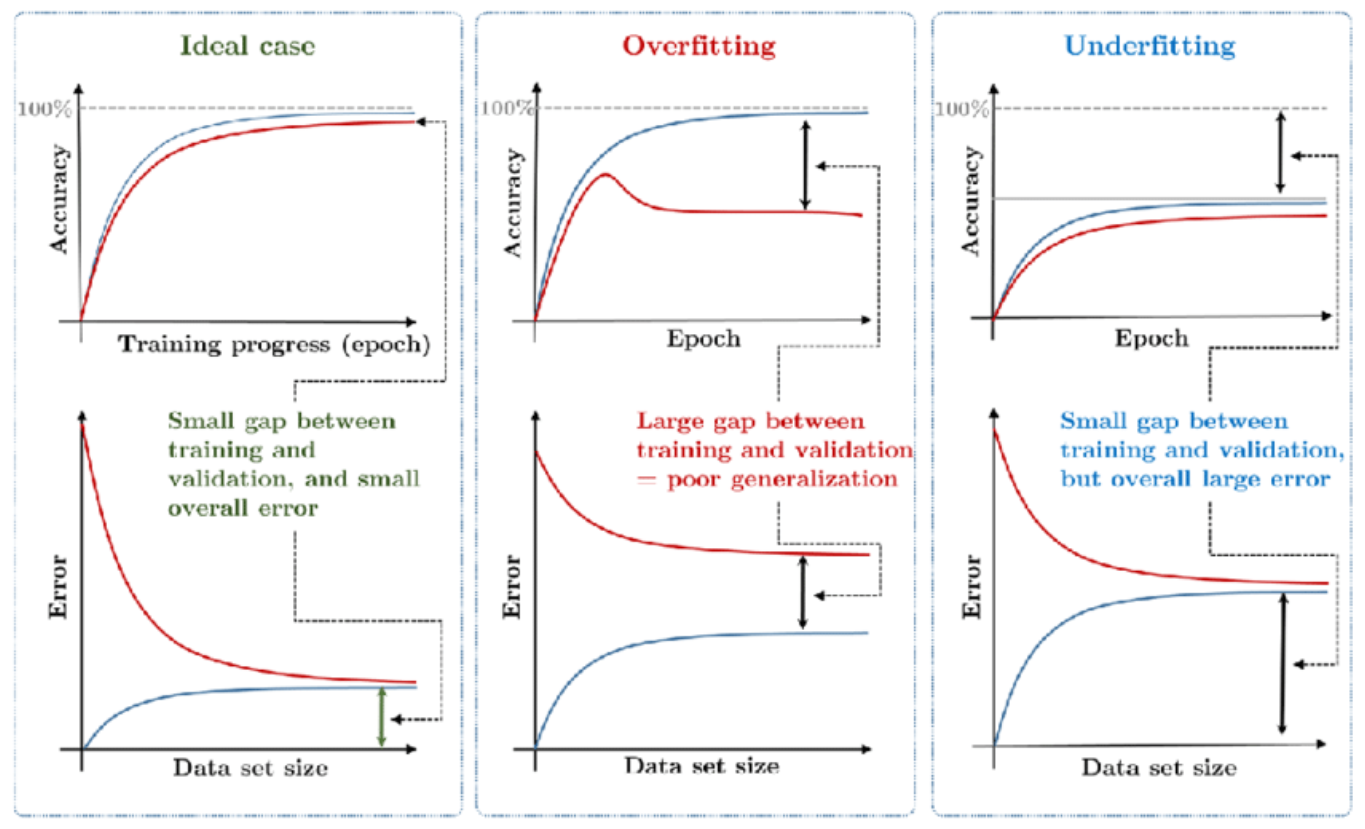
    
Source: https://www.researchgate.net/figure/Learning-curves-can-be-used-to-examine-the-behavior-of-a-neural-network-model-during_fig9_349898718
</div>


<div style="background-color: #FDDA0D; padding: 10px;">

### Is our model overfitting?

Learning curves can be used to identify if a model is overfitting on the training data if the MSE on the training data is very low and vaidation data is very high. This problem arises when we take very small training data points to fit the model. Assume, we only two data points, in this case we are going to fit a model that predicts training data accurately and most defnietely not on test data.
    
Now, as we increase the number of data points in the training data, if there is a meaningul reduction on the validation set error, we can keep doing so until we reach a point of insignificant gap between training and validation errors. Thereby, we are handling overfitting using learning curve. Sometimes, we won't be able to bring down this gap which tells us our model is bad at generalizing (again, overfitting). 
    
### Can we use learning curves to check underfitting?
    
Learning curve by itself doesn't tell if there is underfitting or not because it only shows us the change in error wrt training / validation data and not the actual accuracy of the model. For example, on a linear regression model, we also need to look at the R-squared value to understand the magnitude of error.
        
</div>


# Question 2: Bias-Variance Exploration (**20 points**)
Consider a function $g$ such that $g(x)=2sin(\pi
x)cos(3\pi x^2)$. We will try to fit this function using a simple (binning based) piecewise constant function with varying number of bins. Here the number of bins controls the model complexity.

Note: problem below uses the statistics notation: target is y and your estimates are $y_{hat}$.


a) (2 points) Generate a dataset $(D = X,Y)$ by generating a set of 1-dimensional x's and y's in the following way -
*  $x_i = \frac{i}{2000}$ for each $i$ in $1, 2, 3 \ldots 2000$.
* Then, for each of the $x_i$'s obtain $y_i = 2sin(\pi x_i)cos(3\pi x_i^2)+ N(0,1)$ where $N(0,1)$ denotes the normal distribution with mean 0 and variance 1.

Create 10 such datasets by independently repeating the entire process 10 times. Plot any one of the generated datasets.

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
def generate_data(num_points):
    x = np.arange(1, num_points + 1) / num_points
    ### START CODE ###
    # Compute y according to the labeling function g
    y_no_gauss_noise = 2 * np.sin( np.pi * x) * np.cos(3 * np.pi * x**2)
    y = y_no_gauss_noise + np.random.normal(0, 1, num_points)
    ### END CODE ###
    return x,y,y_no_gauss_noise

5


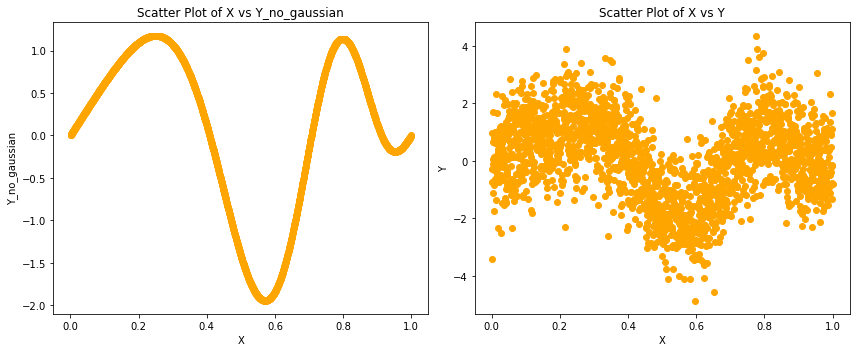

In [2]:

datasets = {}
for j in range(10):
    datasets[j] = {}
    datasets[j]['X'], datasets[j]['Y'], datasets[j]['Y_no_gaussian'] = generate_data(2000)

### START CODE ###
random_number = 5
print(random_number)
selected_dataset = datasets[random_number]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.scatter(selected_dataset['X'], selected_dataset['Y'],c='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X vs Y')

plt.subplot(1, 2, 1)
plt.scatter(selected_dataset['X'], selected_dataset['Y_no_gaussian'], c='orange')
plt.xlabel('X')
plt.ylabel('Y_no_gaussian')
plt.title('Scatter Plot of X vs Y_no_gaussian')
plt.tight_layout()
plt.show()


b) (5 points) Consider an estimator of function $g$, $f(x)$ that divides the x's into $K$ bins such that there are $m = n/K$ data points in each bin and the predicted y for all points in that bin is the mean of all the $y$'s in the bin.
$$
f(x) = \sum_{j=1}^{K} \bar{y}_j \mathbb{1}(x \in \text{bin } j)
$$
where
$$
\bar{y}_j = \frac{1}{m}\sum_{i=j*m}^{(j+1)*m-1} y_i.
$$
Implement this estimator. Obtain $Y_{hat} = f(x)$ for one of the datasets created above by using $K=25$ and plot the predicted $Y_{hat}$ along with $X$ and $Y$.



In [3]:
### START CODE ###
k = 25
x_bins = np.linspace(min(selected_dataset['X']), max(selected_dataset['X']), k + 1)
selected_dataset['Y_hat'] = np.zeros(len(selected_dataset['X']))

for i in range(k):
    bin_mask = (selected_dataset['X'] >= x_bins[i]) & (selected_dataset['X'] <= x_bins[i + 1])
    
    x_bin = selected_dataset['X'][bin_mask]
    y_bin = selected_dataset['Y'][bin_mask]
    selected_dataset['Y_hat'][bin_mask] = np.mean(y_bin)
    

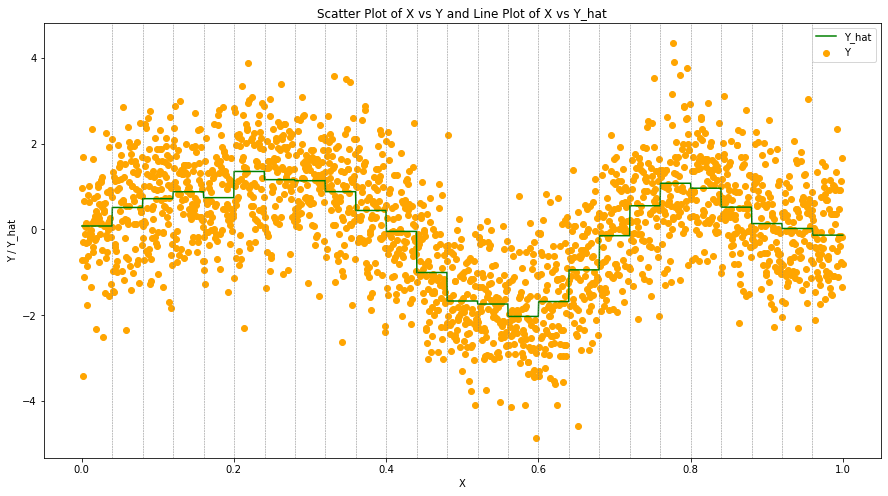

In [4]:
### START CODE ###
# Create a scatter plot of X vs Y
plt.figure(figsize=(15, 8))
plt.scatter(selected_dataset['X'], selected_dataset['Y'], c='orange', label='Y')
plt.plot(selected_dataset['X'], selected_dataset['Y_hat'], 'g-', label='Y_hat')
plt.xlabel('X')
plt.ylabel('Y / Y_hat')
plt.title('Scatter Plot of X vs Y and Line Plot of X vs Y_hat')
for bin_edge in x_bins[1:-1]:
    plt.axvline(x=bin_edge, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()
### END CODE ###

c) (3 points) What do you think will happen to the MSE, the bias and the variance as the number of bins $K$ is increased?


<div style="background-color: #FDDA0D; padding: 10px;">

As the number of bins increase,

**Bias** - Will start going down as more bins will lead to more accurate y_hat values as we are increasing the model complexity   
**Variance** - Variance will keep increasing as  more bins means more variation the value of Y_hat. This is will eventually lead to a model wit very high complexity that performs well on training data but not so well on validation (Overfitting!)  
**MSE** - The relationship between MSE and the number of bins (K) is influenced by both bias and variance. Initially, as K increases, MSE may decrease because bias decreases, and the model fits the training data better. However, beyond a certain point, MSE may start to increase due to the increasing variance. The model may become too complex and overfit the data, leading to poor performance on unseen data.
</div>


d) (5 points) For each dataset, vary the number of bins $K \in \{2,5,10,25,50,100,250, 500, 1000\}$ and obtain the predictions. Also, for any one of the datasets (your choice), compute and plot the MSE obtained with varying $K$.

[1.866092294449006, 1.4156748111179058, 1.1398716234480581, 1.0511349017071674, 1.0279632415895354, 0.9888299329755169, 0.908209336234802, 0.7701507689215081, 0.5215010305516061]


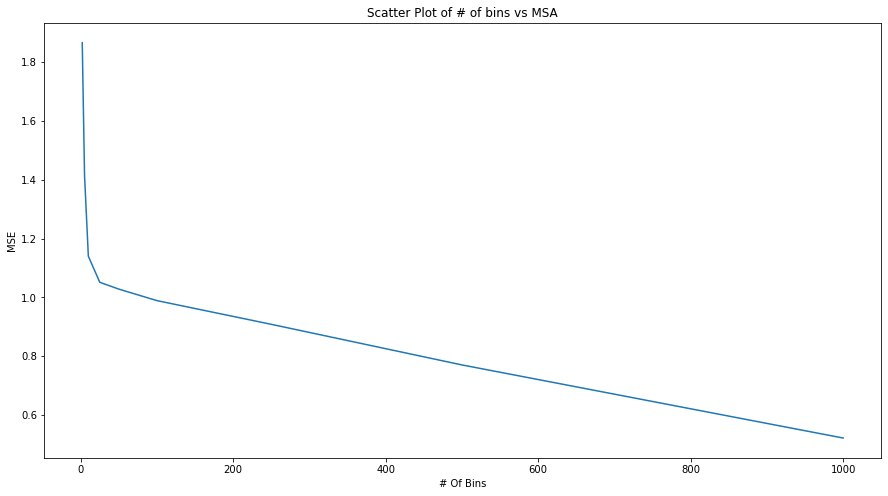

In [5]:
mse_scores = []
K = [2,5,10,25,50,100,250,500,1000]

for i in range(10): #Iterating through the datasets
    temp_df = datasets[i]
    
    for j in K: #Interating through the different bin sizes
        x_bins = np.linspace(min(selected_dataset['X']), max(selected_dataset['X']), j + 1)
        temp_df['Y_hat_'+str(j)] = np.zeros(len(temp_df['X']))

        for l in range(j): # Iterating through each bin and getting the y_hat values
            bin_mask = (temp_df['X'] >= x_bins[l]) & (temp_df['X'] <= x_bins[l + 1])
            x_bin = temp_df['X'][bin_mask]
            y_bin = temp_df['Y'][bin_mask]
            temp_df['Y_hat_'+str(j)][bin_mask] = np.mean(y_bin)
    datasets[i] = temp_df


for n in K:
    ### START CODE ###
    # Compute MSE
    mse = ((selected_dataset['Y'] - selected_dataset['Y_hat_'+str(n)])**2).mean()
    ### END CODE ###
    mse_scores.append(mse)
    
print(mse_scores)

# Create a scatter plot of X vs Y
plt.figure(figsize=(15, 8))
plt.plot(K, mse_scores, label='Y_hat')
plt.xlabel('# Of Bins')
plt.ylabel('MSE')
plt.title('Scatter Plot of # of bins vs MSA')
plt.show()

e) (5 points) Recall the definitions of the bias and variance, and now given the predictions obtained from 10 different datasets, compute the (sample) bias and variance of the model for each of the $K \in \{2,5,10,25,50,100,250,500,1000\}$ and plot $K$  bias-squared vs $K$ and variance vs. $K$  on the same plot.
We are using the term "sample" to remember that bias/variance are "expected quantities" that we are approximating by considering only 10 models, one per dataset.

If y_pred denotes the 2000 x 10 2-D matrix of estimates for 2000 data points and obtained by the function estimated from the 10 datasets, use the following code to obtain the sample bias and variance.

1.8505476726684482 2
1.3908623133633786 5
1.1079533565213477 10
1.0275964270340783 25
1.0169946180237186 50
1.0106363763071824 100
1.0035155287528978 250
0.9905337750267805 500
0.9634161862165912 1000
[1.851192208437041, 1.3930312512269103, 1.1116328145531504, 1.038872965519156, 1.0393469677591762, 1.0564533812194248, 1.1194445232885784, 1.2198763017651084, 1.4239595858313854]


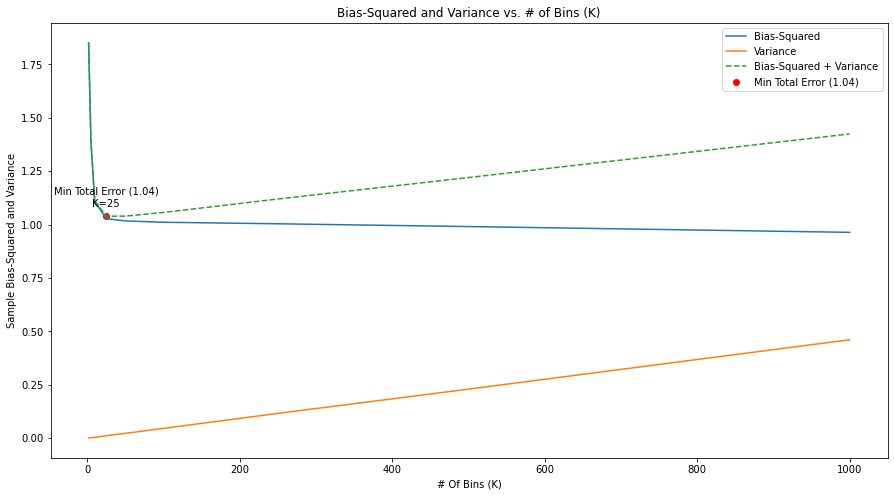

In [6]:
bias_vals = []
var_vals = []
total_vals = []
K = [2,5,10,25,50,100,250,500,1000]
selected_dataset = datasets[9]
for n in K:
    
    y_pred = np.zeros((2000, 10))
    
    for i in range(10):
        y_pred[:, i] = datasets[i]['Y_hat_' + str(n)]  # Already calculated the values of pred-y in the previous code for all datasets

    avg_yhat = np.mean(y_pred, axis=1)
    bias = avg_yhat - selected_dataset['Y']
    
    bias_squared = np.mean(bias**2) #np.mean(bias**2)
    print(bias_squared, n)
    
    variance = np.mean((y_pred - np.mean(y_pred, axis=1, keepdims=True))**2)

    
    bias_vals.append(bias_squared)
    var_vals.append(variance)
    total_vals.append(bias_squared + variance) 

    
min_total_idx = np.argmin(total_vals)

print(total_vals)

# Create a scatter plot of K vs. bias-squared and K vs. variance on the same plot
plt.figure(figsize=(15, 8))
plt.plot(K, bias_vals, label='Bias-Squared')
plt.plot(K, var_vals, label='Variance')
plt.plot(K, total_vals, label='Bias-Squared + Variance', linestyle='--')


# Highlight the point with the lowest value of total_vals
plt.scatter(K[min_total_idx], total_vals[min_total_idx], color='red', label=f'Min Total Error ({total_vals[min_total_idx]:.2f})')

# Annotate the lowest point with both the value and K
plt.annotate(f'Min Total Error ({total_vals[min_total_idx]:.2f})\nK={K[min_total_idx]}', 
             (K[min_total_idx], total_vals[min_total_idx]), 
             textcoords="offset points", 
             xytext=(0,10), 
             ha='center')

plt.xlabel('# Of Bins (K)')
plt.ylabel('Sample Bias-Squared and Variance')
plt.title('Bias-Squared and Variance vs. # of Bins (K)')
plt.legend()
plt.show()


<div style="background-color: #F88379; padding: 10px;">


*We have added the total error ( Bias squared + Variance ) to get get better understanding of the whole process and obtained the ideal bin size (lowest total error)*
    
*Bias squared value tends to 1 because that is the irreducible gaussian noise with unit variance we have added to y*
    
</div>


# Question 3: Stochastic Gradient Descent Improvements (**10 pts**)

## Part 1. (**5 pts**) ##
Read this [blog](https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8) on medium and describe in your own words how momentum leads to a faster convergence of the loss function.




<div style="background-color: #FDDA0D; padding: 10px;">

In gradient descent, there's a potential issue when dealing with regions that have "pathological" curvatures. In such cases, if we use a fixed learning rate and direction to update our parameters, the algorithm may overshoot the optimal point and exhibit erratic behavior. This is especially problematic when gradients vary significantly in different directions.
    
In such situation, there's a need to approach the optimum in small steps. Progress along certain direction tends to zero and in these regions, gradient descent would fumble. Instead, by using exponetially weighted average (dw and db) values, we tend to average the oscillations in the vertical direction closer to zero as they are in both (positive & negative) directions. Momentum enables our algorithm to take a straighter forward path to local optima and to damp out vertical oscillations. Because of this the algorithm will end up with a few iterations to reach local optima.
        
</div>


## Part 2. (**5 pts**) ##
Read this [blog](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461) on medium and explain in your own words the advantages of Mini-batch Stochastic Gradient Descent.




<div style="background-color: #FDDA0D; padding: 10px;">

**MGD Boosts Model Updates**: Unlike Batch Gradient Descent (BGD), Mini-Batch Gradient Descent (MGD) increases the frequency of model updates. Instead of waiting for the entire dataset to be processed, MGD processes smaller batches of data (e.g., 50, 200, 100, or 256 records) for optimization.

**Efficient Memory Usage**: Mini-batching offers a dual advantage—it enhances memory efficiency by not requiring the entire training dataset to be loaded into memory simultaneously, and it facilitates efficient implementation of algorithms. This approach effectively manages memory consumption as it stores losses for each dataset batch.

**Improved Computational Efficiency**: Batch updates in MGD lead to a computationally more efficient optimization process compared to Stochastic Gradient Descent (SGD), where each data point is considered individually. MGD strikes a balance by leveraging batches, resulting in smoother convergence.
        
</div>


# Question 4: Stochastic Gradient Descent (30 pts)

## Part 1. (**10 pts**) Stochastic gradient descent derivation ##

Use stochastic gradient descent to derive the coefficent updates (assuming squared loss is being used as the cost function) for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：

$$ y = w_0 + w_1e^{-x_1} + w_2 x_1 + w_3x_1x_2 $$




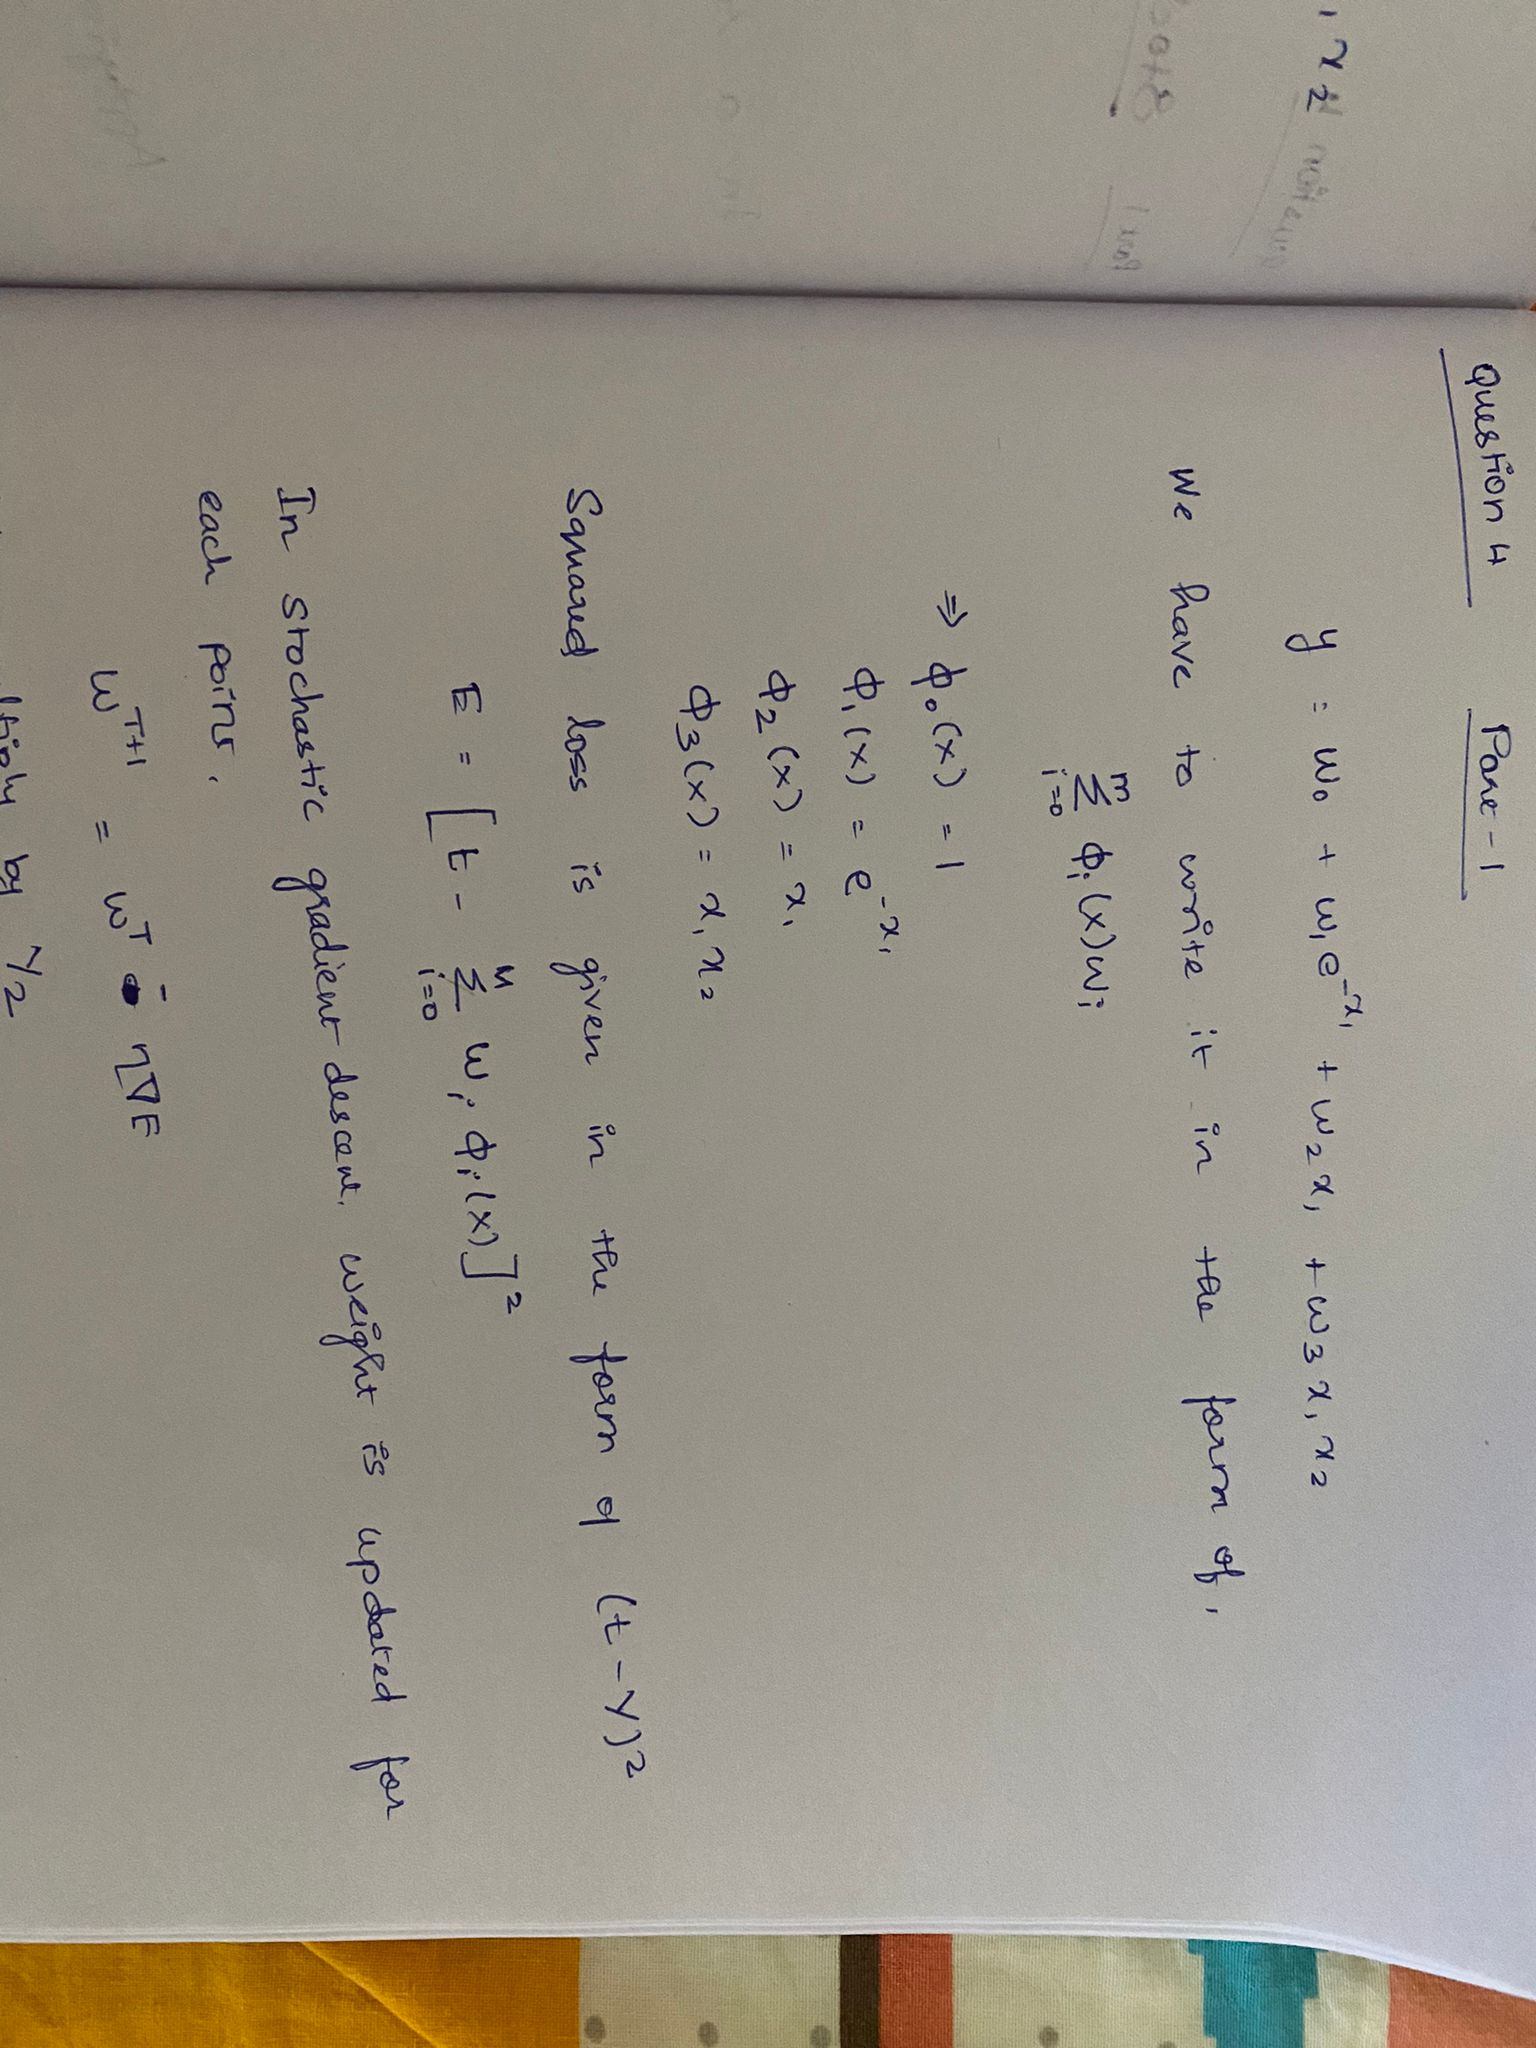

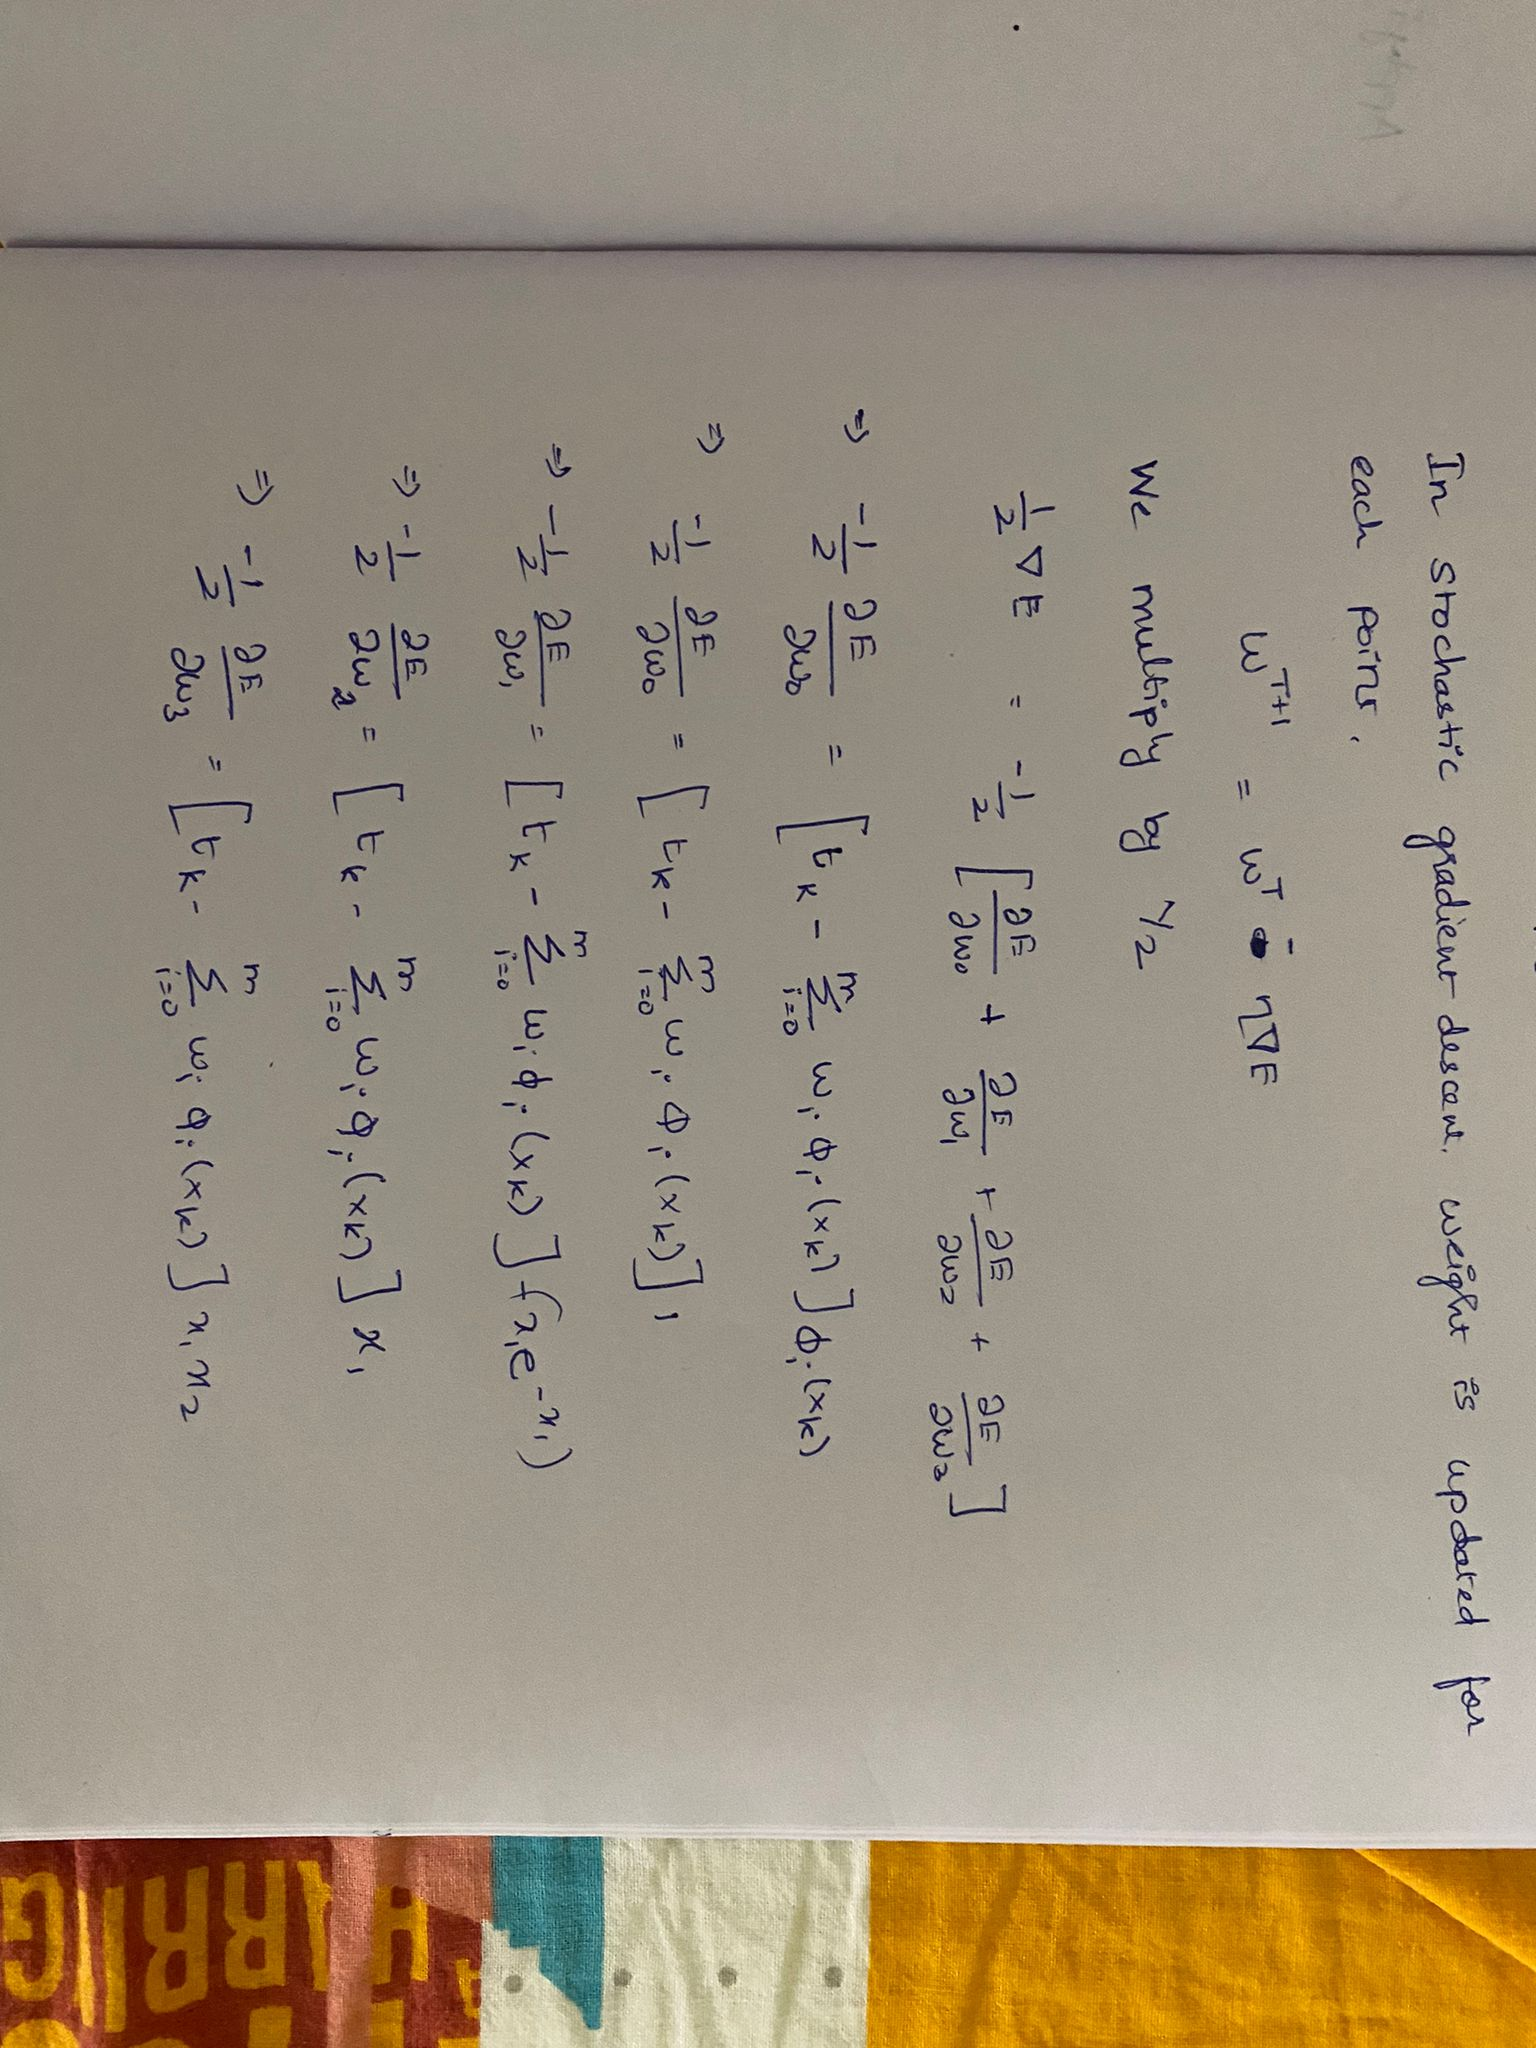

## Part 2. (**20 pts**) Stochastic gradient descent coding ##

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1e^{-x_1} + w_2x_1 + w_3x_1x_2 $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values).

a) (**15 pts**) Use the expression derived in part 1 to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) .

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [7]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:

    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)

    def sgd(self, gradient):
        # Update the self.coef using SGD
        ### START CODE ###
        self.coef = self.coef - self.learning_rate*gradient
        ### END CODE ###

    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
        
                error = y[i] - np.matmul(X[i], self.coef.T)

                # Compute gradients
                
                temp = self.coef.copy()
                temp[0] = 0
                
                gradient = error*X[i] + 2*self.regularization*temp
               
                # Update weights
                self.sgd(-gradient)
                
            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = np.exp(-X[:,0])
        x[:,2] = X[:,0]
        x[:,3] = X[:,0]*X[:,1]

        return x

    def linearPredict(self, X):
        # Compute the dot product of self.coef and X
        ### START CODE ###
        return np.dot(X, self.coef)
        ### END CODE ###

In [8]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

[(0.0001, 0, 0.03682051179745846),
 (0.0001, 10, 128710119.60818361),
 (0.0001, 100, 1.2648725134515642e+122),
 (0.001, 0, 0.030495991520073523),
 (0.001, 10, 7.824038644053512e+121),
 (0.001, 100, nan),
 (0.01, 0, 0.027391087575201017),
 (0.01, 10, nan),
 (0.01, 100, nan),
 (0.1, 0, 0.03098762801418049),
 (0.1, 10, nan),
 (0.1, 100, nan),
 (1, 0, inf),
 (1, 10, nan),
 (1, 100, nan),
 (10, 0, nan),
 (10, 10, nan),
 (10, 100, nan),
 (100, 0, nan),
 (100, 10, nan),
 (100, 100, nan)]

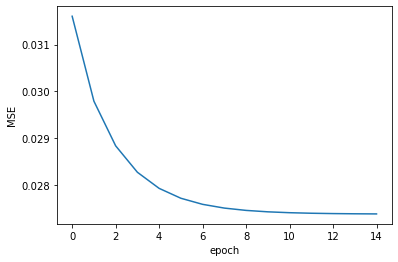

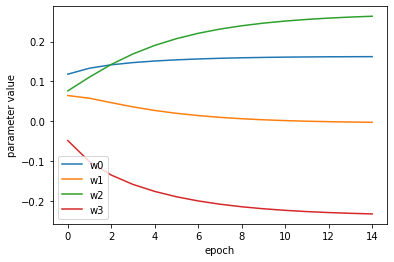

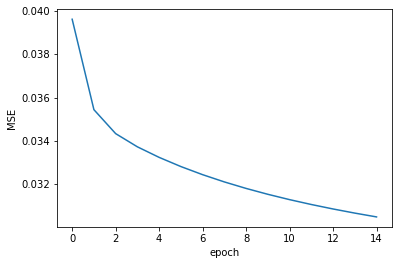

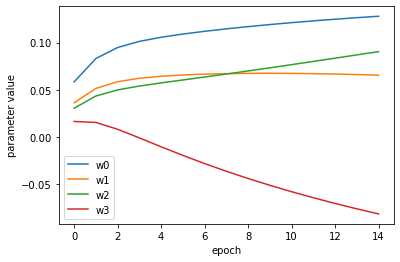

In [9]:
# Iterate through all combinations of learning rates and regularization strength
# Use your Regression class to fit the data and record MSEs
from operator import itemgetter
import warnings
warnings.filterwarnings("ignore")

params = []

for r in learning_rate:
    for re in regularization:
        regr = Regression(r, re, 15)
        regr.fit(X, y, plot = False)
        params.append((r, re, regr.lowest_mse))

display(params)

params.sort(key = itemgetter(2))

regr_2 = Regression(params[0][0], params[0][1], 15)
regr_2.fit(X, y, plot = True)

regr_3 = Regression(params[1][0], params[1][1], 15)
regr_3.fit(X, y, plot = True)

In [10]:
# For the best two combinations, use the plot option in Regression.fit() to plot MSE and parameters as a function of epoch (15 epochs)
for i in [0, 1]:
    print("Best param", i+1, "for Lowest MSE:", params[i][2], "\n Learning rate:", params[i][0], '\n reg param:', params[0][1])

Best param 1 for Lowest MSE: 0.027391087575201017 
 Learning rate: 0.01 
 reg param: 0
Best param 2 for Lowest MSE: 0.030495991520073523 
 Learning rate: 0.001 
 reg param: 0


# Question 5: Visualizing Gradient Descent (**15 pts**) #

## Part 1. **(10 pts)** Coding ##

In this exercise, you are going to visualize four batch update steps of gradient descent for a  linear regression model with two parameters (i.e. weights, indicated by $\theta$).

The true target function is $t = \theta_{0} + \theta_{1}x$ with $\theta_{0}=2$ and $\theta_{1}=0.5$.

Try the following two initializations:
* $\theta_{0}=0$ and $\theta_{1}=0$
* $\theta_{0}=0$ and $\theta_{1}=-4$

and try the following three learning rates:
* 0.5
* 1
* 2.1

Therefore, there will be **six** combinations or settings to consider in total. For each setting, you will plot (a) the data and the changing linear regression fit and (b) the model parameters moving in the weight space after every update.

In [11]:
# Generate data
np.random.seed(42)
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x + np.random.normal(0, 0.2, size=x.shape)

In [12]:
def loss_func(theta0, theta1):
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y - model(x, theta0, theta1))**2, axis=2)/2

def model(x, theta0, theta1):
    return theta0 + theta1 * x

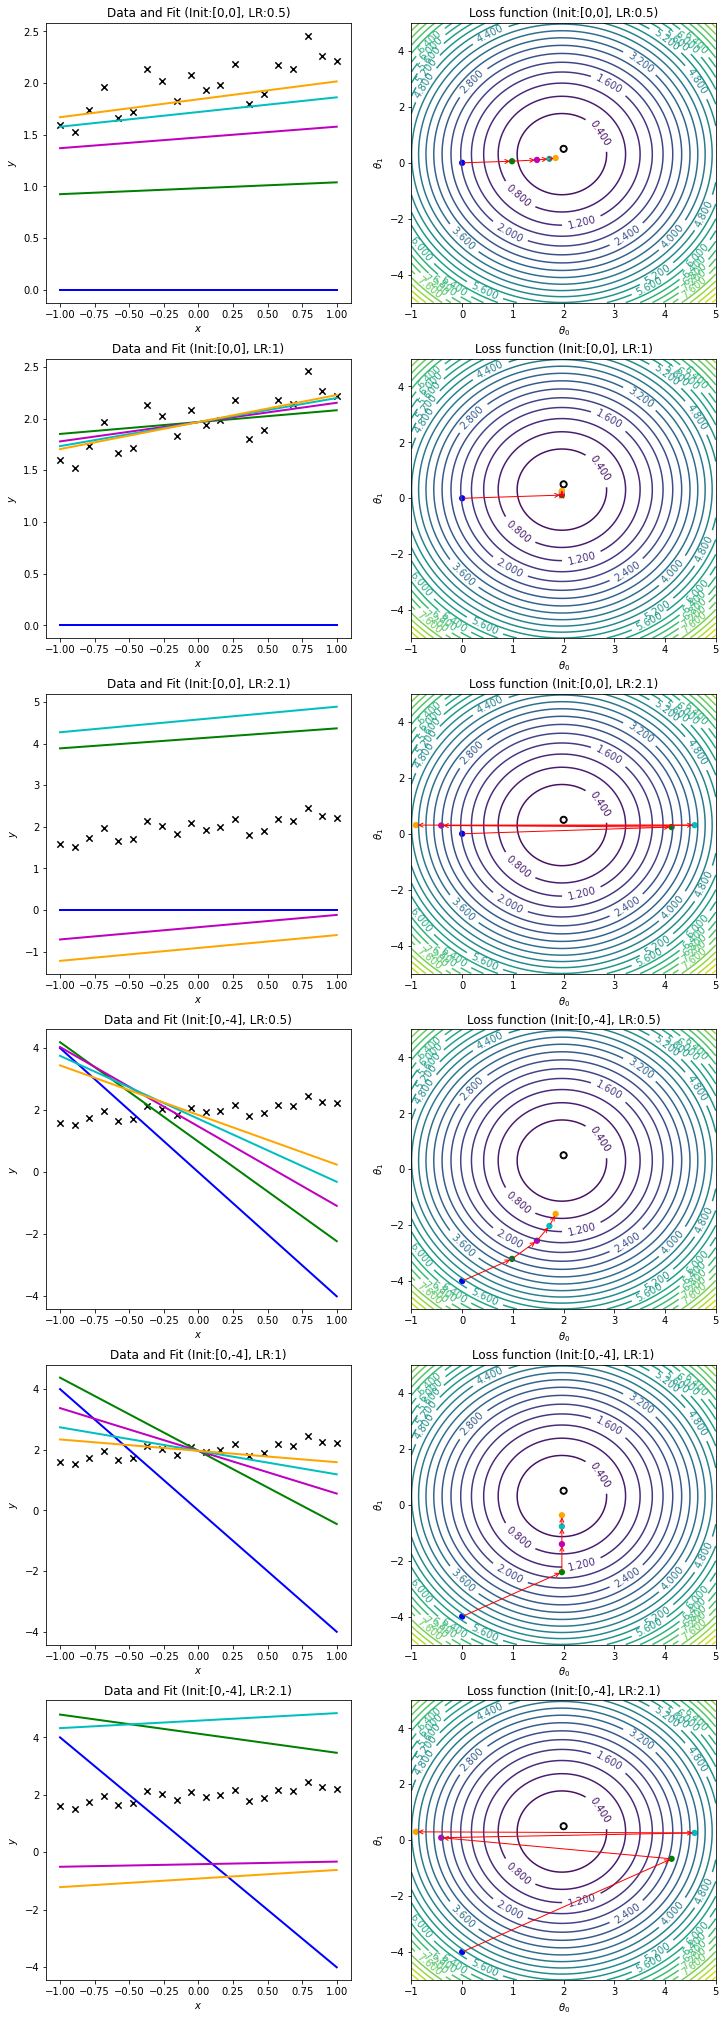

In [13]:
# Experiment with different initialization and learning rate combinations
### START CODE ###
init_list = [(0, 0), (0, -4)]
lr_list = [0.5, 1, 2.1]
### END CODE ###

# Left column shows the data and the changing linear regression models
# Right column shows the model parameters moving over the loss landscape
fig, ax = plt.subplots(nrows=len(init_list) * len(lr_list), ncols=2, figsize=(12, 36))

for i, init in enumerate(init_list):
    for j, lr in enumerate(lr_list):
        row_idx = i * len(lr_list) + j
        ax[row_idx][0].scatter(x, y, marker='x', s=40, color='k')
        theta0_grid = np.linspace(-1,5,101)
        theta1_grid = np.linspace(-5,5,101)
        L_grid = loss_func(theta0_grid[np.newaxis,:,np.newaxis],
                           theta1_grid[:,np.newaxis,np.newaxis])

        # A labeled contour plot for the right column
        X, Y = np.meshgrid(theta0_grid, theta1_grid)
        contours = ax[row_idx][1].contour(X, Y, L_grid, 30)
        ax[row_idx][1].clabel(contours)
        # The target parameter values indicated on the loss function contour plot
        ax[row_idx][1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

        # Take N = 4 steps with learning rate alpha down the steepest gradient, starting at init
        N = 4
        theta = [init] # placeholder list for storing historical parameters
        L = [loss_func(*theta[0])[0]] # placeholder list for storing historical loss values
        for _ in range(N):
            last_theta = theta[-1]
            this_theta = np.empty((2,))
            # Update theta
            ### START CODE ### (2 lines of code)
            this_theta[0] = last_theta[0] - lr * np.mean(-(y - model(x, last_theta[0], last_theta[1])))
            this_theta[1] = last_theta[1] - lr * np.mean(-(y - model(x, last_theta[0], last_theta[1])) * x)
            ### END CODE ###
            theta.append(this_theta)
            L.append(loss_func(*this_theta))

        # Annotate the loss function plot with coloured points indicating the
        # parameters chosen and red arrows indicating the steps down the gradient.
        # Also plot the fit function on the LHS data plot in a matching colour.
        colors = ['b', 'g', 'm', 'c', 'orange']
        ax[row_idx][0].plot(x, model(x, *theta[0]), color=colors[0], lw=2,
                   label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
        for k in range(1,N+1):
            ax[row_idx][1].annotate('', xy=theta[k], xytext=theta[k-1],
                           arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                           va='center', ha='center')
            ax[row_idx][0].plot(x, model(x, *theta[k]), color=colors[k], lw=2,
                   label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[k]))
        ax[row_idx][1].scatter(*zip(*theta), c=colors, s=40, lw=0)

        # Labels and titles.
        ax[row_idx][1].set_xlabel(r'$\theta_0$')
        ax[row_idx][1].set_ylabel(r'$\theta_1$')
        ax[row_idx][1].set_title(f'Loss function (Init:[{init[0]},{init[1]}], LR:{lr})')
        ax[row_idx][0].set_xlabel(r'$x$')
        ax[row_idx][0].set_ylabel(r'$y$')
        ax[row_idx][0].set_title(f'Data and Fit (Init:[{init[0]},{init[1]}], LR:{lr})')
        axbox = ax[row_idx][0].get_position()

plt.show()

## Part 2. **(5 pts)** ##
For the experiment above, briefly summarize what you observed about the impact of (i) initialization and (ii) learning rate, on the evolution of the model parameters.

<div style="background-color: #FDDA0D; padding: 10px;">

**Our observations based on the above graphs -**    

**Initialization**

Clearly, we can see that the initialization point has an influence on the level of learning or the reduction in error that we observe after 4 batch updates. The proximity to minima from the initialization point determines how quickly the model converges as the gradient will keep pointing in the direction of shortest distance to minima. So closer the the better!
    
In our model we can clearly see that initializing at (0,0) is much better than initializing at (0,-4) from looking at the charts where the learning rate is 1. We are taking learning rate=1 to prove our point because it clearly is the most ideal learning rate of the three options.

**Learning Rate**
    
Learning rate of 0.05 and 1 are both doing a good job in moving towards the minima. But 0.05 is slower at converging than 1. So 1 seems to be the most ideal learning rate in this case. Learning rate of 2.1 looks quite high which is clear from the diverengence from the minima.
    
In general it is important to understand that very low learning rate is not good as it can get stuck in local minima or it can take many batches to converge (Slow). Likewise, very high learning rate can lead to divergence fromt the minima completely.
    
</div>
